# Agglomerative Implementation

In [140]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [150]:
image_name = 'ssstar'

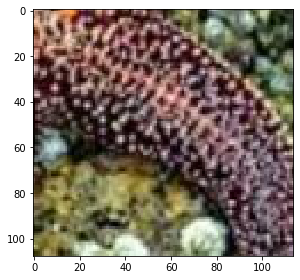

In [151]:
image = io.imread(image_name + '.jpg')
io.imshow(image)

In [143]:
image.shape

(214, 235, 3)

In [152]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

print(image.shape)
print(image[:5])

(12312, 3)
[[217 176 158]
 [206 167 150]
 [192 155 139]
 [187 154 137]
 [165 133 118]]


In [145]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 16
agg = KMeans(n_clusters = 16)
agg.fit(image)

centers = np.asarray(agg.cluster_centers_, dtype = np.uint8)
centers

array([[237, 247, 225],
       [ 66,  56,  39],
       [137, 131,  75],
       [ 17,   7,   3],
       [158, 170, 140],
       [ 86,  90,  55],
       [207, 167, 161],
       [217, 220, 192],
       [135, 101, 100],
       [ 46,  28,  17],
       [134, 143, 111],
       [106, 112,  82],
       [173, 167, 105],
       [184, 198, 163],
       [104,  68,  68],
       [168, 132, 129]], dtype=uint8)

In [146]:
labels = np.asarray(agg.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(50290,)
(214, 235)


array([[ 0,  7,  0, ..., 10,  5,  5],
       [13,  4,  4, ...,  4,  5,  1],
       [ 1, 10, 13, ..., 11,  1,  9],
       ...,
       [10,  5,  2, ...,  5,  3,  1],
       [11, 11,  1, ...,  5,  1, 10],
       [11,  5,  9, ..., 10, 10,  7]], dtype=uint8)

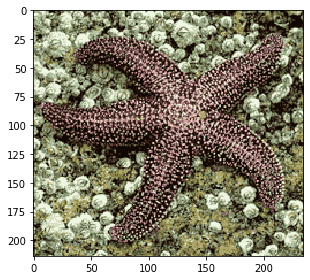

In [147]:
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assign every pixel the rgb color of their label's center
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('sk_agg' + image_name + '.jpg', newImage)

io.imshow(newImage)

In [153]:
iters = 10
clusters = [[i] for i in range(len(image))]
centroids = [image[i] for i in range(len(image))]

In [ ]:
min = np.inf
minj,mink = 0,0
for i in range(iters):
    for j in range(len(centroids)):
        for k in range(len(centroids)):
            if j != k:
                dist = np.linalg.norm(centroids[j]-centroids[k])
                if dist < min:
                    minj = j
                    mink = k
                    min = dist
    centroids = [centroids[c] for c in range(len(centroids)) if c not in (minj,mink)]

    cluster = clusters[minj] + clusters[mink]
    centroids.append(np.mean([image[c] for c in cluster], axis=0))
    print(centroids[-1])

    clusters = [clusters[c] for c in range(len(clusters)) if c not in (minj,mink)]

    clusters.append(cluster)

In [ ]:
newImage = [0] * len(image)
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        print(centroids[i])
        pixel = [int(centroids[i][0]),
                 int(centroids[i][1]),
                 int(centroids[i][2])]
        newImage[clusters[i][j]] = pixel

In [ ]:
newImage = np.array(newImage)
newImage = newImage.reshape((rows, cols, 3))

io.imsave('kmeans_' + image_name + '.jpg', newImage)

io.imshow(newImage)